In [1]:
pip install scikit-learn pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
print('modules imported')

modules imported


In [3]:
#Load CSV data
data = pd.read_csv("Lyft_Data_V1.csv")

print("CSV file loaded as 'data'")


CSV file loaded as 'data'


In [5]:
#Create a dataframe of my ride information
rides = pd.DataFrame(data)
rides.tail()

,Date,Day of Week,Ride ID Number,Total Pay,Tip,Bonus,Base Pay,Stop In Ride,Start Time,End Time,Estimated Booked Time,Actual Booked Time,Distance Estimated,Distance Actual,Passenger Payment
27,8/25/2025,Sunday,1276,$12.15,$0.00,$0.00,$12.15,No,5:05 PM,5:33 PM,27,27,13.96,13.75,$15.29
28,8/25/2025,Sunday,1277,$12.85,$3.80,$0.00,$9.05,No,6:09 PM,6:35 PM,24,26,12.15,12.23,$18.99
29,8/25/2025,Sunday,1278,$4.11,$0.00,$0.00,$4.11,No,6:35 PM,6:49 PM,13,14,3.88,3.86,$8.66
30,8/25/2025,Sunday,1279,$8.01,$0.00,$1.25,$6.76,No,6:49 PM,7:12 PM,21,23,7.85,7.73,$11.68
31,8/25/2025,Sunday,1280,$9.07,$0.00,$1.50,$7.57,No,7:12 PM,7:33 PM,21,21,11.03,11.14,$19.67


In [6]:
#remove special characters from columns including dollar signs

rides[["Total Pay"]] = rides[["Total Pay"]].replace('[\$,]', '', regex=True).astype(float)
rides[["Base Pay"]] = rides[["Base Pay"]].replace('[\$,]', '', regex=True).astype(float)
rides[["Tip"]] = rides[["Tip"]].replace('[\$,]', '', regex=True).astype(float)
rides[["Bonus"]] = rides[["Bonus"]].replace('[\$,]', '', regex=True).astype(float)
rides[["Passenger Payment"]] = rides[["Passenger Payment"]].replace('[\$,]', '', regex=True).astype(float)

#display head for verification
rides.tail()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\cbhut\AppData\Local\Temp\ipykernel_18860\1778869599.py:3: SyntaxWarning: invalid escape sequence '\$'
  rides[["Total Pay"]] = rides[["Total Pay"]].replace('[\$,]', '', regex=True).astype(float)
C:\Users\cbhut\AppData\Local\Temp\ipykernel_18860\1778869599.py:4: SyntaxWarning: invalid escape sequence '\$'
  rides[["Base Pay"]] = rides[["Base Pay"]].replace('[\$,]', '', regex=True).astype(float)
C:\Users\cbhut\AppData\Local\Temp\ipykernel_18860\1778869599.py:5: SyntaxWarning: invalid esca

,Date,Day of Week,Ride ID Number,Total Pay,Tip,Bonus,Base Pay,Stop In Ride,Start Time,End Time,Estimated Booked Time,Actual Booked Time,Distance Estimated,Distance Actual,Passenger Payment
27,8/25/2025,Sunday,1276,12.15,0.0,0.00,12.15,No,5:05 PM,5:33 PM,27,27,13.96,13.75,15.29
28,8/25/2025,Sunday,1277,12.85,3.8,0.00,9.05,No,6:09 PM,6:35 PM,24,26,12.15,12.23,18.99
29,8/25/2025,Sunday,1278,4.11,0.0,0.00,4.11,No,6:35 PM,6:49 PM,13,14,3.88,3.86,8.66
30,8/25/2025,Sunday,1279,8.01,0.0,1.25,6.76,No,6:49 PM,7:12 PM,21,23,7.85,7.73,11.68
31,8/25/2025,Sunday,1280,9.07,0.0,1.50,7.57,No,7:12 PM,7:33 PM,21,21,11.03,11.14,19.67


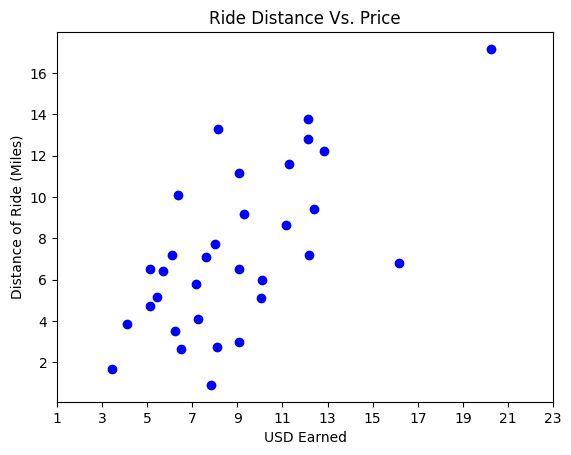

In [7]:
#create a scatter plot
plt.scatter(rides["Total Pay"], rides["Distance Actual"], color="blue")

#Add Labels and Title
plt.title("Ride Distance Vs. Price")
plt.xlabel("USD Earned")
plt.ylabel("Distance of Ride (Miles)")

#set x ticks to a range of 1-24 counting by 2
plt.xticks(np.arange(1,25,2))
plt.show()

In [8]:
avg_price = rides["Total Pay"].mean()
avg_price = avg_price.round()

In [9]:
print("This week I averaged $",avg_price,"per ride!")

This week I averaged $ 9.0 per ride!


In [10]:
#next fit a linear regression model! 
x = rides[["Total Pay"]] 
y = rides[["Distance Actual"]]

model = LinearRegression()
model.fit(x, y)

print("Slope (Coef):", model.coef_)
print("Intercept:", model.intercept_)

Slope (Coef): [[0.70986446]]
Intercept: [0.97917804]


In [11]:
y_pred = model.predict(x)

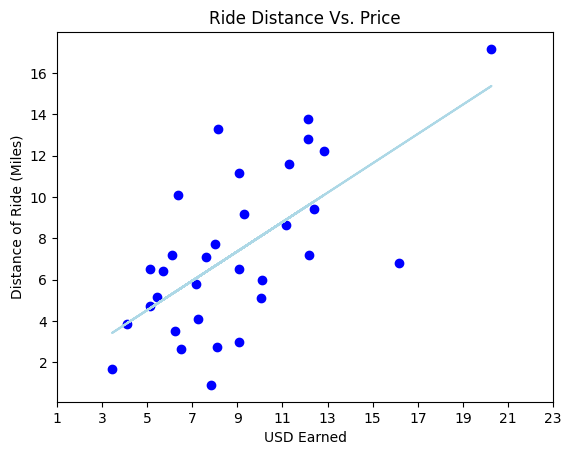

In [12]:
#recreate a scatter plot
plt.scatter(rides["Total Pay"], rides["Distance Actual"], color="blue")
plt.plot(x,y_pred, color="lightblue")

#Add Labels and Title
plt.title("Ride Distance Vs. Price")
plt.xlabel("USD Earned")
plt.ylabel("Distance of Ride (Miles)")

#set x ticks to a range of 1-24 counting by 2
plt.xticks(np.arange(1,25,2))
plt.show()

In [19]:
rides.tail()

,Date,Day of Week,Ride ID Number,Total Pay,Tip,Bonus,Base Pay,Stop In Ride,Start Time,End Time,Estimated Booked Time,Actual Booked Time,Distance Estimated,Distance Actual,Passenger Payment
27,8/25/2025,Sunday,1276,12.15,0.0,0.00,12.15,No,5:05 PM,5:33 PM,27,27,13.96,13.75,15.29
28,8/25/2025,Sunday,1277,12.85,3.8,0.00,9.05,No,6:09 PM,6:35 PM,24,26,12.15,12.23,18.99
29,8/25/2025,Sunday,1278,4.11,0.0,0.00,4.11,No,6:35 PM,6:49 PM,13,14,3.88,3.86,8.66
30,8/25/2025,Sunday,1279,8.01,0.0,1.25,6.76,No,6:49 PM,7:12 PM,21,23,7.85,7.73,11.68
31,8/25/2025,Sunday,1280,9.07,0.0,1.50,7.57,No,7:12 PM,7:33 PM,21,21,11.03,11.14,19.67


In [17]:
passpay = rides[["Passenger Payment"]]
mypay = rides[["Total Pay"]]
mytips = rides[["Tip"]]
basepay = rides[["Base Pay"]]
bonuses = rides[["Bonus"]]

print('Total customer pay was', passpay.sum())
print('My total pay was', mypay.sum())
print('Total base pay was', basepay.sum())
print('My total tips counts was', mytips.sum())
print("Total of bonuses was", bonuses.sum())

Total customer pay was Passenger Payment    431.67
dtype: float64
My total pay was Total Pay    285.5
dtype: float64
Total base pay was Base Pay    197.12
dtype: float64
My total tips counts was Tip    27.16
dtype: float64
Total of bonuses was Bonus    61.62
dtype: float64


In [24]:
TotalCustomerPay = 431.67
MyTotalEarnings = 285.5
Tips = 27.16
Earnings = 197.12 + 61.62

percent_earnings = (Earnings * 100) / TotalCustomerPay

print("I made", Earnings, "before tips")
print("I earned", percent_earnings, "% of customer payments before my priority mode adjustment")

I made 258.74 before tips
I earned 59.939305487988506 % of customer payments before my priority mode adjustment


In [25]:
#These were the 3 Priority mode adjustments I was given in this period of time
adjustments = 0.34 + 15.54 + 4.10
print("I made a total of $", adjustments, "in priority mode adjustments")

I made a total of $ 19.979999999999997 in priority mode adjustments


In [27]:
Earnings + adjustments

278.72

In [32]:
total_earnings = 278.72
new_percent_earnings = (total_earnings * 100) / TotalCustomerPay

print("I made", percent_earnings, "% of customer payments before my priority mode adjustment")
print("I made", new_percent_earnings, "% of customer payments after my priority mode adjustment")

I made 59.939305487988506 % of customer payments before my priority mode adjustment
I made 64.56784117497163 % of customer payments after my priority mode adjustment


In [36]:
diff = new_percent_earnings-percent_earnings 

print("Lyft paid me an additional", diff,"%. This brings my earnings to a total of", new_percent_earnings,"% of customer payments.")

Lyft paid me an additional 4.6285356869831205 %. This brings my earnings to a total of 64.47517779785484 % of customer payments.


In [18]:
len(rides)

32